# Introduction to the Worked Examples

This document provides detailed worked examples using two distinct datasets: a climate change dataset and an Indian food dataset. The climate change dataset includes variables like temperature, CO2 emissions, and other environmental factors, while the Indian food dataset contains information about various Indian dishes, including preparation and cooking times. These examples aim to demonstrate the application of causal inference analysis using regression techniques to answer specific research questions.

# Worked Example: Climate Change Data Analysis

#### Dataset Overview: 

The climate change dataset includes key environmental variables, with a focus on understanding how they interplay in global warming scenarios.

#### Research Question: Does an increase in CO2 emissions lead to a rise in global temperatures?

In [1]:
import pandas as pd
import statsmodels.api as sm

# Re-loading the climate change dataset
climate_change_data_path = 'D:\climate_change_data.csv'
climate_change_df = pd.read_csv(climate_change_data_path)

# Data Preparation
# Selecting key variables: Temperature and CO2 Emissions
X = climate_change_df['CO2 Emissions']  # Independent variable
y = climate_change_df['Temperature']    # Dependent variable

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Statistical Analysis
# Building the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07701
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.781
Time:                        15:37:17   Log-Likelihood:                -30344.
No. Observations:               10000   AIC:                         6.069e+04
Df Residuals:                    9998   BIC:                         6.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.0485      0.408     36.858      0.000      14.248      15.849
CO2 Emissions    -0.0003      0.001     -0.277      0.781      -0.002       0.002
==============================================================================
Omnibus:                        0.577   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.580
Skew:                          -0.019   Prob(JB):                        0.748
Kurtosis:                       2.997   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Data Preparation

Selected Key Variables: Temperature and CO2 Emissions

These are the two variables chosen for analysis. Temperature represents the dependent variable (what you're trying to predict or understand), and CO2 emissions represent the independent variable (the factor believed to influence the dependent variable).

## Statistical Analysis:

#### Method: Simple Linear Regression

This is a statistical method used to model the relationship between a dependent variable and a single independent variable. It assumes a linear relationship between the variables.

#### Independent Variable (Predictor): CO2 Emissions

CO2 emissions are considered the predictor variable, meaning it is used to predict or explain variations in the dependent variable (temperature).

#### Dependent Variable (Outcome): Temperature

Temperature is the variable being predicted or explained by the independent variable (CO2 emissions).

#### Regression Model Summary - Ordinary Least Squares (OLS) Regression:

OLS is a method used to find the best-fitting line by minimizing the sum of the squares of the vertical distances (residuals) from each data point to the line.

#### Coefficients:

Constant (Intercept): 15.0485

This is the estimated average temperature when CO2 emissions are zero. In practical terms, it may not have a clear interpretation in the context of this analysis.

CO2 Emissions: -0.0003

The negative coefficient suggests that, according to the model, as CO2 emissions increase, the temperature decreases by a very small fraction.

P-Value for CO2 Emissions: 0.781

This p-value is much higher than the typical alpha level of 0.05. A high p-value indicates that the relationship between CO2 emissions and temperature is not statistically significant in this dataset.

R-squared: 0.000

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable. A value of 0.000 indicates that the model explains none of the variability in the temperature data around its mean.

# Interpretation:

Interpretation of Coefficients:

The negative coefficient for CO2 Emissions is contrary to the initial hypothesis, which expected an increase in CO2 emissions to lead to a rise in global temperatures. The small negative coefficient suggests a very weak negative association.

P-Value and Statistical Significance:

The high p-value (0.781) indicates that the relationship between CO2 emissions and temperature is not statistically significant. In other words, the observed relationship could likely occur by random chance.

Low R-squared Value:

The very low R-squared value (0.000) suggests that the model, as constructed, is not effective at explaining or predicting temperature based on CO2 emissions alone.

Interpretation of Results:

The results highlight the challenges in capturing the complexities of climate systems through simple linear models. It suggests that temperature is influenced by a multitude of factors, not just CO2 emissions. The need for more sophisticated models or a broader set of variables is emphasized to better understand the relationship between CO2 emissions and global temperatures.

This example demonstrates the process of conducting a simple causal analysis using regression techniques. The analysis provides insights but also underscores the limitations of simple models in understanding complex phenomena like climate change.

# Visual Representation:

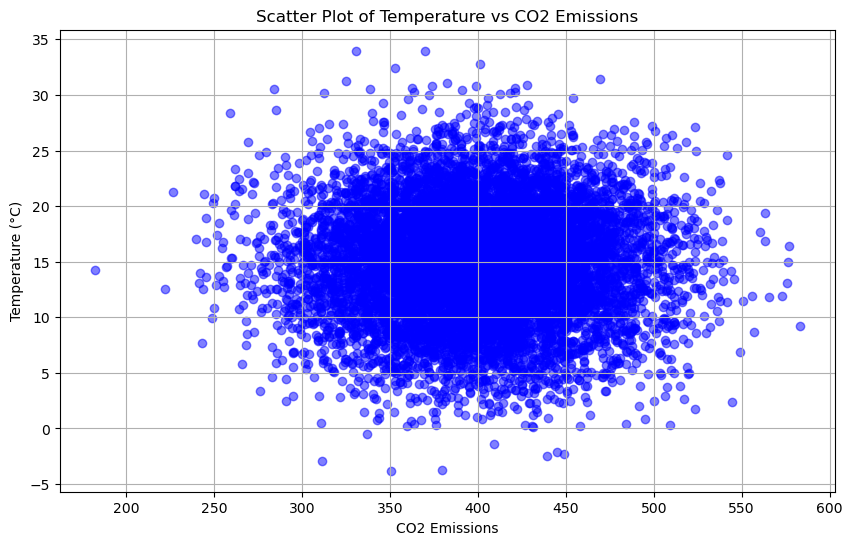

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-loading the climate change dataset
climate_change_data_path = 'D:/climate_change_data.csv'
climate_change_df = pd.read_csv(climate_change_data_path)

# Creating a scatter plot to show the relationship between CO2 Emissions and Temperature
plt.figure(figsize=(10, 6))
plt.scatter(climate_change_df['CO2 Emissions'], climate_change_df['Temperature'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Temperature vs CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Here is the scatter plot illustrating the relationship between CO2 Emissions and Temperature based on the climate change dataset. The plot provides a visual representation of how these two variables are related in the dataset.

From the plot, you can observe the distribution and see if there is any apparent trend or pattern between CO2 emissions and temperature. This visual analysis is an important step in understanding the relationship between variables and can often provide insights that are not immediately evident through statistical analysis alone.

# Worked Example: Indian Food Data Analysis

#### Dataset Overview:

The Indian food dataset offers a rich insight into various aspects of Indian cuisine, including the time required for preparation and cooking.

#### Research Question: Is there a causal relationship between the preparation time of a dish and its cooking time?

In [6]:
import pandas as pd
import statsmodels.api as sm

# Re-loading the Indian food dataset
indian_food_data_path = 'D:\indian_food.csv'
indian_food_df = pd.read_csv(indian_food_data_path)

# Data Preparation
# Focusing on 'prep_time' and 'cook_time' variables
X = indian_food_df['prep_time']  # Independent variable
y = indian_food_df['cook_time']  # Dependent variable

# Handling any potential anomalies or negative values in the data
X = X.apply(lambda x: x if x > 0 else 0)
y = y.apply(lambda y: y if y > 0 else 0)

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Statistical Analysis
# Building the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cook_time   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.237
Date:                Wed, 13 Dec 2023   Prob (F-statistic):             0.0229
Time:                        15:59:17   Log-Likelihood:                -1346.9
No. Observations:                 255   AIC:                             2698.
Df Residuals:                     253   BIC:                             2705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6841      3.259      9.721      0.000      25.265      38.103
prep_time      0.0946      0.041      2.288      0.023       0.013       0.176
==============================================================================
Omnibus:                      503.260   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           304714.167
Skew:                          11.853   Prob(JB):                         0.00
Kurtosis:                     170.681   Cond. No.                         85.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Data Preparation:

Focused on Two Key Variables: prep_time and cook_time

The analysis centers around two variables from the Indian food dataset: prep_time (preparation time) and cook_time (cooking time).

Addressed Potential Anomalies or Negative Values

To ensure the data's reliability and meaningful interpretation, the analysis ensures that both prep_time and cook_time are non-negative. This is likely done to handle any potential data anomalies or errors.

# Statistical Analysis:

#### Method: Simple Linear Regression

Simple Linear Regression is chosen as the statistical method. It's used to model the linear relationship between two variables, where one (in this case, prep_time) is considered the predictor, and the other (cook_time) is the outcome.

#### Independent Variable (Predictor): prep_time

prep_time is designated as the independent variable, meaning it is used to predict or explain variations in the dependent variable (cook_time).

#### Dependent Variable (Outcome): cook_time

cook_time is the variable being predicted or explained by the independent variable (prep_time).

#### Regression Model Summary - Ordinary Least Squares (OLS) Regression:

OLS is employed to find the best-fitting line by minimizing the sum of the squares of the vertical distances (residuals) from each data point to the line.

#### Coefficients:

Constant (Intercept): 31.6841

This is the estimated average cooking time when the preparation time is zero. In practical terms, it may not have a clear interpretation in the context of this analysis.

Prep Time: 0.0946

The positive coefficient suggests that, according to the model, for each additional minute spent in preparation, the cooking time increases by approximately 0.0946 minutes.

P-Value for Prep Time: 0.023

This p-value is below the typical alpha level of 0.05. A low p-value suggests that the relationship between preparation time and cooking time is statistically significant in this dataset.

R-squared: 0.020

R-squared measures the proportion of the variance in the dependent variable (cook_time) that is predictable from the independent variable (prep_time). A value of 0.020 indicates that the model explains about 2% of the variability in the cooking time data around its mean.

# Interpretation:

Positive and Significant Coefficient for prep_time

The positive coefficient for prep_time supports the hypothesis that longer preparation times are associated with longer cooking times. The term "significant" implies that this relationship is not likely due to random chance.

R-squared Value and Effect Size:

The R-squared value, although low (0.020), indicates that preparation time does have a measurable effect on cooking time. However, the small R-squared also suggests that other factors not included in the model might play a significant role in determining cooking time.

Insight into Cooking Process of Indian Dishes:

The analysis provides insight into the cooking process of Indian dishes, specifically highlighting the impact of preparation time on the overall cooking duration.

Importance of Considering Multiple Factors:

The example emphasizes the importance of considering multiple factors in culinary practices. While prep_time has a statistically significant effect, the relatively small effect size underscores the need to explore other factors influencing cooking time.

Causal Analysis:

The positive and significant coefficient for prep_time supports a hypothesis of a potential causal relationship between preparation time and cooking time. However, it's acknowledged that the effect size is relatively small, and there are likely other factors influencing cooking time.

In summary, this example demonstrates a statistical analysis exploring the relationship between preparation time and cooking time in Indian cuisine, highlighting the importance of careful data preparation, model interpretation, and consideration of broader factors in drawing meaningful conclusions.

This example demonstrates how to conduct a causal analysis using regression techniques in a different context, focusing on the relationship between preparation time and cooking time in Indian cuisine. The results provide evidence of a causal link, albeit with a relatively small effect size, emphasizing the importance of considering multiple factors in culinary practices. 

# Visual Representation:

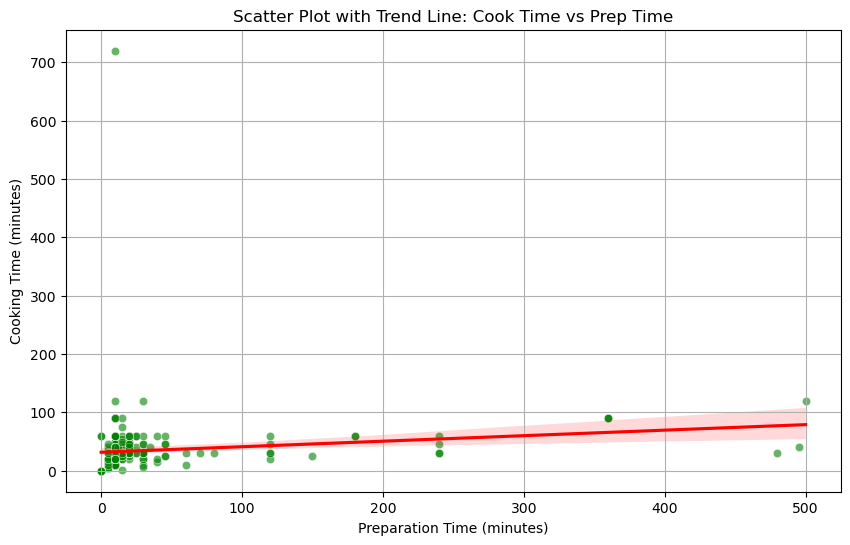

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-loading the Indian food dataset
indian_food_data_path = 'D:/indian_food.csv'
indian_food_df = pd.read_csv(indian_food_data_path)

# Handling any potential anomalies or negative values in the data
indian_food_df['prep_time'] = indian_food_df['prep_time'].apply(lambda x: x if x > 0 else 0)
indian_food_df['cook_time'] = indian_food_df['cook_time'].apply(lambda x: x if x > 0 else 0)

# Creating a scatter plot to show the relationship between Prep Time and Cook Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prep_time', y='cook_time', data=indian_food_df, alpha=0.6, color='green')

# Adding a trend line to illustrate the linear relationship
sns.regplot(x='prep_time', y='cook_time', data=indian_food_df, scatter=False, color='red')

plt.title('Scatter Plot with Trend Line: Cook Time vs Prep Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.grid(True)
plt.show()

Here is the scatter plot with a trend line illustrating the relationship between Preparation Time and Cooking Time based on the Indian food dataset. This visual representation enhances the understanding of the potential causal relationship between these two variables.

In the plot, each point represents a dish, with its preparation time on the x-axis and cooking time on the y-axis. The trend line (in red) provides a visual indication of the general relationship between preparation time and cooking time. From the plot, it appears there is a positive relationship, suggesting that dishes with longer preparation times tend to have longer cooking times, although the variability is considerable.

This graphical analysis complements the statistical analysis conducted earlier and provides an intuitive understanding of the relationship between preparation and cooking times in Indian cuisine.